## EDA (exploratory data analysis)

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

sns.set()

Import the iris dataset

In [46]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data = np.c_[X, y], columns = iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### BinSwarm Plot

is more usefull than histograms and more representative.

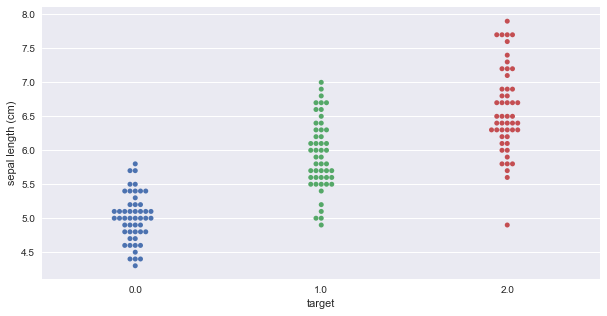

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = sns.swarmplot(
    x = 'target',
    y = 'sepal length (cm)',
    data = df,
    ax = ax
)

_ = plt.xlabel('target')
_ = plt.ylabel('sepal length (cm)')

plt.show()

### Plot ECDF with percentiles

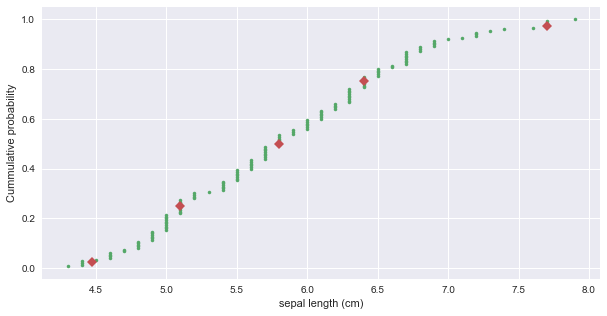

In [57]:
def ecdf(data):
    n = data.shape[0]
    x = np.sort(data)
    # Probabilities
    y = np.arange(1, n + 1, 1.) / n
    
    return x, y

fig, ax = plt.subplots(figsize=(10, 5))

# Calculate ECDF
x_plot, y_plot = ecdf(df['sepal length (cm)'])

# Calculate percentiles
perc = np.array([2.5, 25, 50, 75, 97.5])
perc_vals = np.percentile(x_plot, perc)

# Plot ECDF & percentiles
_ = plt.plot(x_plot, y_plot, marker = '.', linestyle = 'none', color = 'C1')
_ = plt.plot(perc_vals, perc / 100., marker = 'D', linestyle = 'none', color = 'C2')

_ = plt.xlabel('sepal length (cm)')
_ = plt.ylabel('Cummulative probability')

plt.show()

## Boxplot

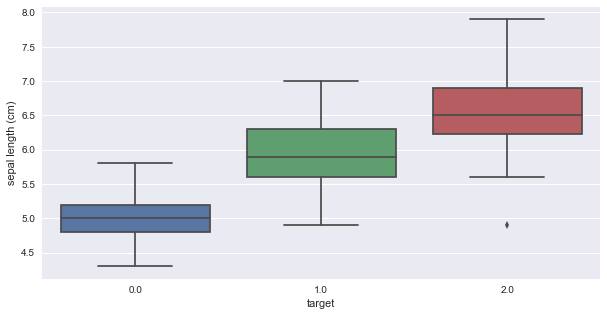

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = sns.boxplot(
    x = 'target',
    y = 'sepal length (cm)',
    data = df,
    ax = ax
)

_ = plt.xlabel('target')
_ = plt.ylabel('sepal length (cm)')

plt.show()

## ScatterPlot

is used for correlation visual demonstration.

Correlation between two features is 0.872


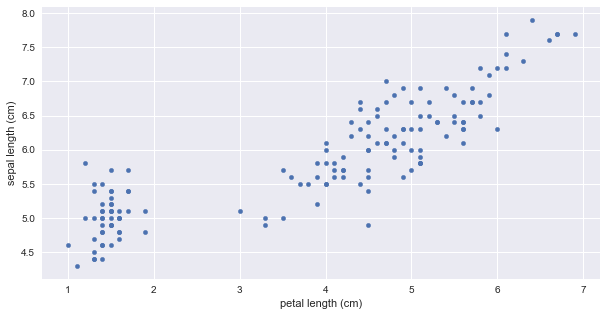

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = df.plot.scatter(
    x = 'petal length (cm)',
    y = 'sepal length (cm)',
    ax = ax
)

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('sepal length (cm)')

print(
    'Correlation between two features is {:.3f}'.format(
        df[
            ['petal length (cm)', 'sepal length (cm)']
        ].corr().loc['petal length (cm)', 'sepal length (cm)']
    )
)


plt.show()

Notes:
1. Number of bins for histograms $N_{bins} = \sqrt{N}$.
